# 🌟 Assignment 2. Operation "AI GeoGuessr"

### Deadline: Monday, October 21, 2024, 11:59:00 PM CET (GMT +2)

## 🎯 Mission Overview

The operation consists of two independent missions. Similar to the previous operation, students are required to solve the tasks by achieving the required score and answering the follow-up questions.

## 🧪 Neural Networks and Unsupervised Learning

1. **Mission 2.1 (Supervised Learning)**: 
   - Solve a supervised learning problem using a Neural Network (MLP). This is similar to a problem you have worked on before but requires the use of a neural network model.

2. **Mission 2.2 (Unsupervised Learning)**:
   - Given an unlabeled dataset, your task is to cluster similar data points and achieve 100% clustering accuracy. You will not have access to the true labels, but you can verify your cluster assignments using the Kaggle competition provided.

## 📝 Delivery Format (Blackboard)

Please submit **two files**:
1. The completed Jupyter notebook.
2. The solution for the second dataset as a CSV file with two `int` columns: `['ID', 'cluster']`.

## Kaggle details
- Invitation link: https://www.kaggle.com/t/6610d6c6ba314eac9ead0b7a47695700
- Kaggle is a popular platform for data science competitions.
- It allows us to create a Private competition where you can submit your solutions and verify whether you are thinking in the right direction.
- The results of the competition is visible only to the competition participants. 
- We will not grade the submissions on Kaggle, we set it up to let you check your clustering.
- You still have to deliver the `.csv` file of the solution and the complete `.ipynb` notebook with discussions and solution code.  



> Good luck, comrade!

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 🧠 Mission 2.1: Decoding SkyNet's Neural Encryption **(using Neural Networks)**

### 🌐 The Discovery
The dataset consists of the same "Synapse Cipher" data from Assignment 1.

### 🎯 Your Mission
1. Implement a neural network (MLP) using one of the following frameworks: Keras, PyTorch, or TensorFlow.
2. Solve the non-linear problem without manual feature engineering. So the manual feature engineering is not allowed!
3. Predict SkyNet's binary decisions (0 or 1) based on paired signals.
4. Enhance performance by using techniques such as learning rate scheduling, selecting a good optimizer, and fine-tuning training hyperparameters.

> Note: There are no restrictions on the tricks you can use — just achieve the required accuracy. Stack more layers, use AdamW, scheduling, ect. Have fun :) 

### 📊 Formal Requirements
1. **Implementation**:
   - Develop a Neural Network using predefined functions/layers.
   - Use one of the popular frameworks: Keras, PyTorch, or TensorFlow.
   - Implement a manual learning rate scheduler with warmup and cosine decay.

2. **Performance**: Achieve at least **0.92** accuracy on the test set.

3. **Discussion**:
   - How did you achieve the reproducibility of the results?
   - Visualize the network's architecture and decision boundary.
   - Which optimizer did you choose? Discuss the differences between the SGD and Adam optimizers.
   - Visualize the learning rate dynamics. Did the learning rate scheduling improve performance? Why or why not?
   - Conduct an ablation study of each architectural and optimization choice concerning test accuracy.


In [2]:
from torchviz import make_dot
from sklearn.preprocessing import StandardScaler

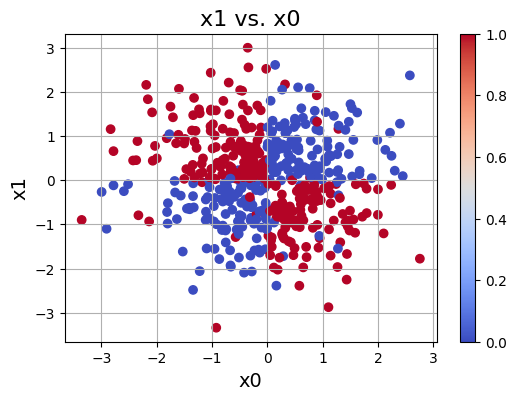

In [3]:
data = pd.read_csv('nn_data.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

X_train = train[['x0', 'x1']].values
y_train = train['y'].values

X_test = test[['x0', 'x1']].values
y_test = test['y'].values

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('x1 vs. x0', fontsize=16)
plt.colorbar()

Test accuracy with ADAM and scheduler: 0.9240000247955322
Test loss with ADAM and scheduler: 0.31731703877449036
Test accuracy with SGD and scheduler: 0.7360000014305115
Test loss with SGD and scheduler: 0.5945724248886108


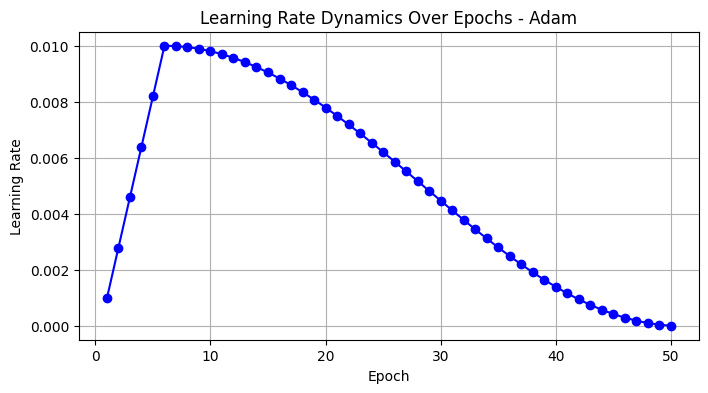

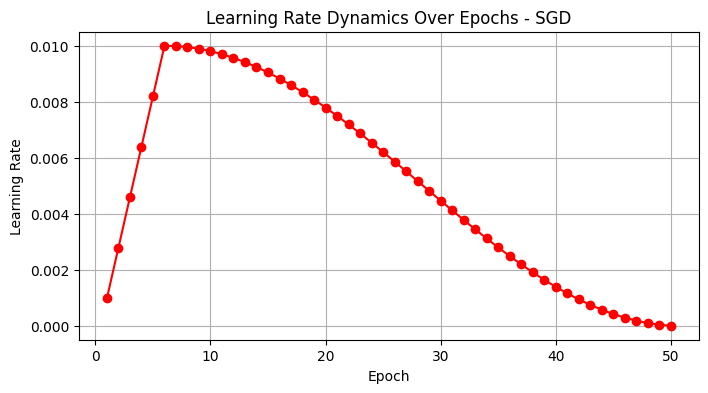

Test accuracy with ADAM without scheduler: 0.921999990940094
Test loss with ADAM without scheduler: 0.34684643149375916
Test accuracy with SGD without scheduler: 0.6079999804496765
Test loss with SGD without scheduler: 0.6925995945930481


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 845 (3.30 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 564 (2.21 KB)

23790/23790 ━━━━━━━━━━━━━━━━━━━━ 8s 323us/step


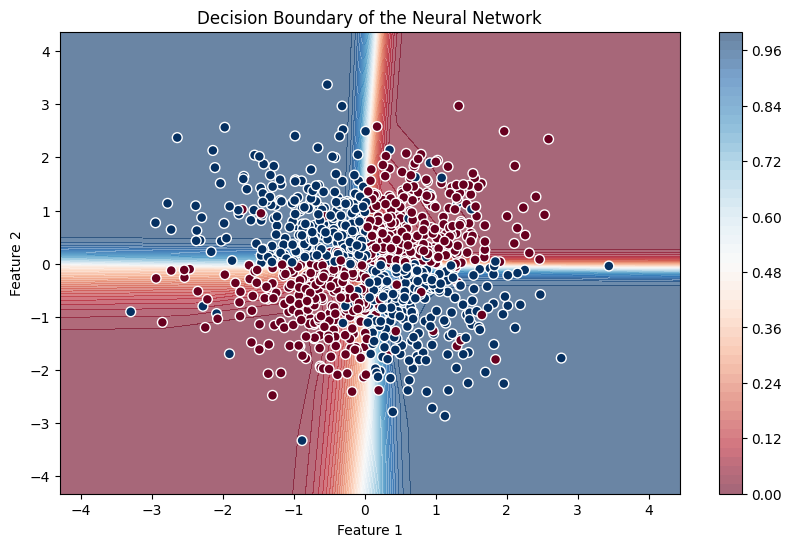

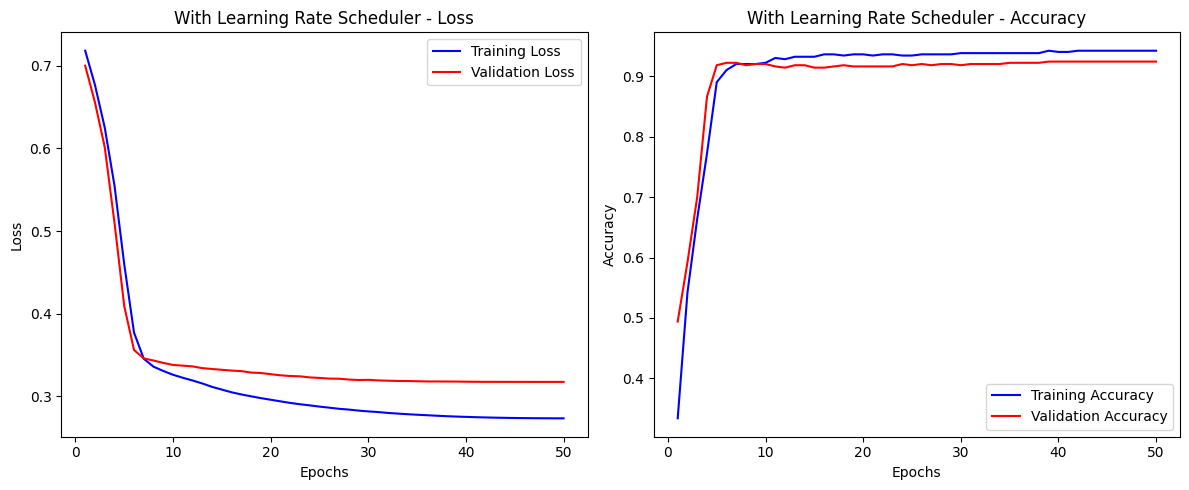

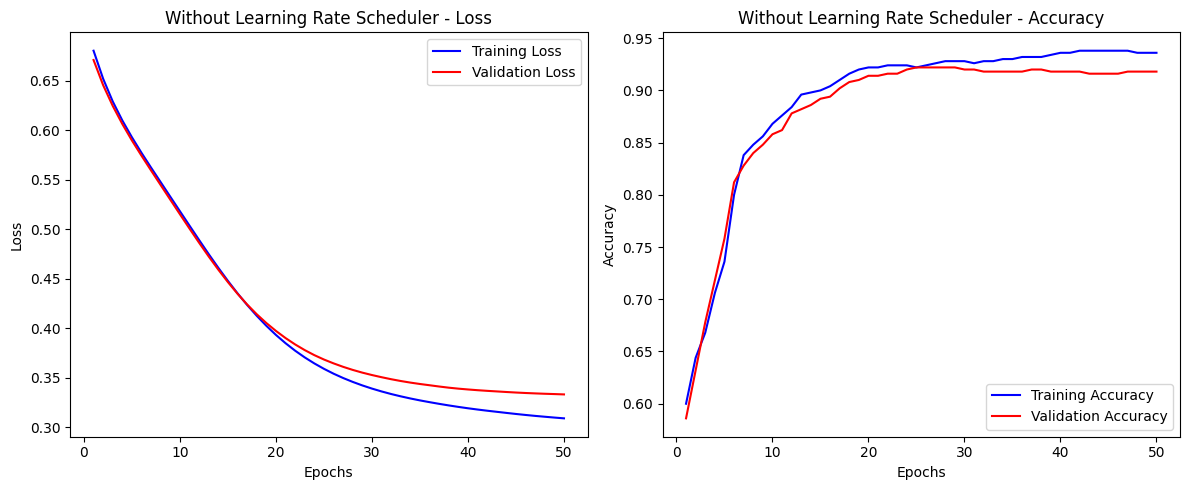

In [4]:

import numpy as np
from tensorflow.keras.layers import Input
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import LearningRateScheduler
import tensorflow as tf
import random


# Set random seeds
np.random.seed(1919)
tf.random.set_seed(1919)
random.seed(1919)

# Build the neural network model for Adam optimizer
model = Sequential([
    Input(shape=(2,)),  # Define the input layer
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Initialize lists to store learning rates
lr_list_adam = []
lr_list_sgd = []

# Define the learning rate schedule function
def get_lr_schedule(lr_list):
    def lr_schedule(epoch, lr):
        initial_lr = 0.001
        max_lr = 0.01
        warmup_epochs = 5
        total_epochs = 50

        if epoch < warmup_epochs:
            lr = initial_lr + (max_lr - initial_lr) * (epoch / warmup_epochs)
        else:
            decay_epochs = total_epochs - warmup_epochs
            decay_epoch = epoch - warmup_epochs
            cosine_decay = 0.5 * (1 + np.cos(np.pi * decay_epoch / decay_epochs))
            lr = max_lr * cosine_decay

        lr_list.append(lr)
        return lr
    return lr_schedule

# Create the LearningRateScheduler callbacks
lr_schedule_adam = get_lr_schedule(lr_list_adam)
lr_schedule_sgd = get_lr_schedule(lr_list_sgd)

  
lr_scheduler_sgd = LearningRateScheduler(lr_schedule_sgd)

# Compile the model with Adam optimizer
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)



# Train the model with Adam optimizer
history_adam = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler_adam],
    verbose=0
)

# Build the neural network model for SGD optimizer
model_sgd = Sequential([
    Input(shape=(2,)),  # Define the input layer
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with SGD optimizer
model_sgd.compile(
    optimizer=SGD(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model with SGD optimizer
history_sgd = model_sgd.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler_sgd],
    verbose=0
)

# Evaluate the models on the test set
test_loss_adam, test_accuracy_adam = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy with ADAM and scheduler:', test_accuracy_adam)
print('Test loss with ADAM and scheduler:', test_loss_adam)

test_loss_sgd, test_accuracy_sgd = model_sgd.evaluate(X_test, y_test, verbose=0)
print('Test accuracy with SGD and scheduler:', test_accuracy_sgd)
print('Test loss with SGD and scheduler:', test_loss_sgd)

# Plot learning rate over epochs for Adam
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(lr_list_adam) + 1), lr_list_adam, 'bo-')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Dynamics Over Epochs - Adam')
plt.grid(True)
plt.show()

# Plot learning rate over epochs for SGD
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(lr_list_sgd) + 1), lr_list_sgd, 'ro-')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Dynamics Over Epochs - SGD')
plt.grid(True)
plt.show()

# Build the neural network model without scheduler for Adam
model_no_scheduler = Sequential([
    Input(shape=(2,)),  # Define the input layer
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
model_no_scheduler.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model without the learning rate scheduler
history_no_scheduler = model_no_scheduler.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=0
)

# Evaluate the model without the scheduler for Adam
test_loss_no_scheduler, test_accuracy_no_scheduler = model_no_scheduler.evaluate(X_test, y_test, verbose=0)
print('Test accuracy with ADAM without scheduler:', test_accuracy_no_scheduler)
print('Test loss with ADAM without scheduler:', test_loss_no_scheduler)

# Build the neural network model without scheduler for SGD
model_no_scheduler_sgd = Sequential([
    Input(shape=(2,)),  # Define the input layer
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with SGD optimizer
model_no_scheduler_sgd.compile(
    optimizer=SGD(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model without the learning rate scheduler for SGD
history_no_scheduler_sgd = model_no_scheduler_sgd.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=0
)

# Evaluate the model without the scheduler for SGD
test_loss_no_scheduler_sgd, test_accuracy_no_scheduler_sgd = model_no_scheduler_sgd.evaluate(X_test, y_test, verbose=0)
print('Test accuracy with SGD without scheduler:', test_accuracy_no_scheduler_sgd)
print('Test loss with SGD without scheduler:', test_loss_no_scheduler_sgd)


################################################## Network architecture  ######################################

model.summary()

##################################################  Decision Boundary Visualization  ######################################

import numpy as np
import matplotlib.pyplot as plt

# Assuming X, y are your original data (before splitting)
# If you only have X_train and y_train, combine them for visualization
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# Create a meshgrid over the feature space
x_min, x_max = X_combined[:, 0].min() - 1, X_combined[:, 0].max() + 1
y_min, y_max = X_combined[:, 1].min() - 1, X_combined[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.01),
    np.arange(y_min, y_max, 0.01)
)

# Flatten the grid to pass through the model
grid = np.c_[xx.ravel(), yy.ravel()]
grid_scaled = scaler.transform(grid)  

# Predict the class probabilities for each point in the grid
Z = model.predict(grid_scaled)
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
# Contour plot to show decision boundary
contour = plt.contourf(xx, yy, Z, levels=50, cmap='RdBu', alpha=0.6)

# Scatter plot of the data points
plt.scatter(
    X_combined[:, 0], X_combined[:, 1],
    c=y_combined, cmap='RdBu', edgecolor='white', s=50
)

plt.title('Decision Boundary of the Neural Network')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(contour)
plt.show()


# Rebuild the neural network model
model_no_scheduler = Sequential([
    Input(shape=(2,)),  # Define the input layer
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with the same optimizer and learning rate
model_no_scheduler.compile(
    optimizer=Adam(learning_rate=0.001),  # Using the same initial learning rate
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model without the learning rate scheduler
history_no_scheduler = model_no_scheduler.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=0
)


def plot_training_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)
    
    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_training_history(history_adam, 'With Learning Rate Scheduler')

plot_training_history(history_no_scheduler, 'Without Learning Rate Scheduler')


- How did you achieve the reproducibility of the results?

By setting random seeds. This way the randomness implemented within the models do not cause different outputs on consecutive runs. I set the random seed for numpy, tensorflow and python's random.

- Visualize the network's architecture and decision boundary.

The networks architecture shows the hidden layers and the output layer of the neural network. The first two rows in the visualized table are the hidden layers while the alst one is the output layer. The input layer is not shown explicitly in the summary, but the input shape is (input_shape=(2,)), which means it expects two input features per sample. The output layer has a sigmoid activation  because we are doing binary classification (one class or another)

- Which optimizer did you choose? Discuss the differences between the SGD and Adam optimizers.

I chose the Adam optimizer. The Adam optimizer is more adaptive to learning rates as opposed to SGD. The difference one can see in practice is that Adam optimizer is usually easier to work with as we dont have to worry about hyperparameter tuning as much, while SGD requires good hyper parameters to work well. SGD is better at finding the best possible model if you have time and resource to tune momentum and learning rate. 

- Visualize the learning rate dynamics. Did the learning rate scheduling improve performance? Why or why not?

The learning rate scheduling did improve performance by a tiny margin, from 0.922 to 0.924, this is because the model might already be sufficiently powerful, so the scheduler provides only marginal gains using ADAM. For SGD on the other hand we see a significant increase from 0.61 to 0.74, this is because we havn't tried to properly tune this model for SGD. This supports the claim that ADAM does not require a lot of tuning, unlike SGD. 

- Conduct an ablation study of each architectural and optimization choice concerning test accuracy.

I tried multiple levels of hidden nodes, 3 to 4 with it being much lower or slightly lower than 0.92
Also noticed that using less nodes in the next layer than the previous one in the hidden layers, often gave better results.
It also seems the chances of getting 0.92 or higher depends on carefully choosing the network architecture. Because most variations gave less accuracy.  
I tried with 2 levels of hidden layers as well which gave good results depending on the amount of nodes.
The rest was mentioned earlier. Fortunately, or unfortunately (depending on how you look at it), my first try with ADAM and the network with 2 hidden network levels going 64 on level 1 to 32 on level 2 gave results that were higher than 0.90, which made me try less things in total to accomplish the task requirement.

The graphs also show training accuracy and loss graphs, during validation and training, with and without the scheduler implementation. The scheduler did improve both the accuracy and loss of the model. 

# 📶📡🛰️🤳 Mission 2.2: Locate the AI Servers

### 🌐 The Discovery
The NTNU Intelligence team has intercepted encrypted documentation that potentially reveals the locations of AI-compromised servers within Trondheim. Our analysts believe the data contains information about these servers' locations. 

However, the number of servers and their exact positions remain unknown. To execute a strategic response, we need to understand the intercepted data and pinpoint the main AI servers.

We have also discovered a vulnerability in the AI's security: it has deployed a clustering verification feature on Kaggle. We can exploit this backdoor to validate our clustering hypotheses.

### 🎯 Your Mission
Identify the number of hidden servers (clusters) in the dataset. Assign cluster labels to each row in the original dataset and validate your clustering solution on Kaggle.  When achieved the perfect clustering accuracy, find the precise locations of these servers (clusters).

### 🧠 The Challenge
1. **Large Dataset**: The intercepted data file contains numerous features, making direct manipulation and clustering difficult. Applying dimensionality reduction techniques could help reveal patterns.
2. **Unsupervised Learning**: No target labels are provided, so you must identify patterns based solely on the dataset's features.
3. **Data Obfuscation**: The AI has obfuscated the data, making it difficult to discern its true structure. You must effectively manipulate the data to visually identify server locations.


### 🚀 Your Tools
- The intercepted AI dataset.
- Skills in feature engineering, data manipulation, and visualization.
- Clustering algorithms (e.g., KMeans, DBSCAN, Birch, Agglomerative Clustering, etc.) — [Clustering in Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html)
- Dimensionality reduction techniques (e.g., PCA, t-SNE, Isomap, UMAP, etc.)
- Kaggle competition platform with a daily submission limit of 50 attempts (~30 days * 50 submissions = 1500 total attempts per student).

> Note: Kaggle competition link — [Kaggle Competition](https://www.kaggle.com/t/6610d6c6ba314eac9ead0b7a47695700)

### 📊 Formal Requirements
1. **Achieve 100% Clustering Accuracy** on Kaggle.
> Note: The only way to check whether your clustering is correct is to submit it to Kaggle. We do not give you the clusters directly.

2. **Discussion Questions**:
   - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.
   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.
   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?
   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.


In [5]:
data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
# Get the ID column
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)

('col_16383', (127, 127))


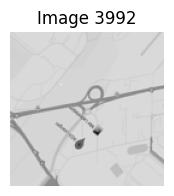

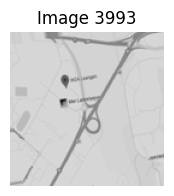

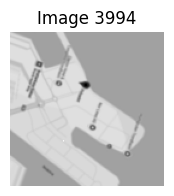

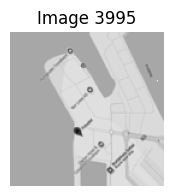

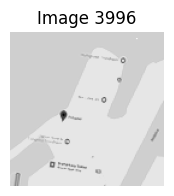

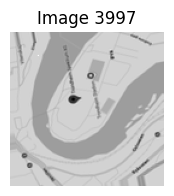

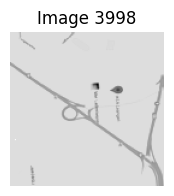

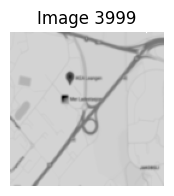

Number of unique images: 4000


In [6]:
#data

import hashlib

# Load the dataset including column names
data = pd.read_csv('unsupervised_data.csv', header=0)

# Reset index to create 'ID' column  //Dont know why the task wants to create an ID column so badly
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)

# Load the data including column names
data = pd.read_csv('unsupervised_data.csv', header=0)

# Exclude the 'ID' column
feature_columns = [col for col in data.columns if col != 'ID']

# Create a mapping from column names to indices
# A dictionary of column names with their corresponding numerical values (indexes display in column name)
col_indices = {}

for col in feature_columns:
    # Extract the index number from the column name
    index = int(col.split('_')[1])
    col_indices[col] = index


# Map column names to their grid positions
# A dictionary with column name and its corresponding position value 
col_positions = {}

for col, index in col_indices.items():
    row = index // 128  # Floor division by 128
    col_num = index % 128
    col_positions[col] = (row, col_num)

# Sort the columns based on their grid positions
sorted_cols = sorted(col_positions.items(), key=lambda x: (x[1][0], x[1][1]))  # Sort by row and if two rows are the same then use their column position for tie breaking

print(sorted_cols[-1])
# Extract the sorted column names
sorted_column_names = [col for col, pos in sorted_cols]

# Get the data values in the correct order
X_unscrambled = data[sorted_column_names].values

# Reshape each row into a 128x128 image
X_images = X_unscrambled.reshape(-1, 128, 128)


# Visualize a few images to verify
for i in range(8):   # Change it to 4000 for 4000 images. Best of luck not crashing your pc comrade!
    plt.figure(figsize=(2, 2))
    plt.imshow(X_images[i+4000-8], cmap='gray')
    plt.title(f'Image {i+4000-8}')
    plt.axis('off')
    plt.show()

def hash_image(image):
    return hashlib.md5(image.tobytes()).hexdigest()

# Compute hashes for all images
image_hashes = [hash_image(img) for img in X_images]

# Map each hash to a unique cluster label
unique_hashes = list(set(image_hashes))
hash_to_label = {h: idx for idx, h in enumerate(unique_hashes)}
labels = [hash_to_label[h] for h in image_hashes]
print(f"Number of unique images: {len(unique_hashes)}")


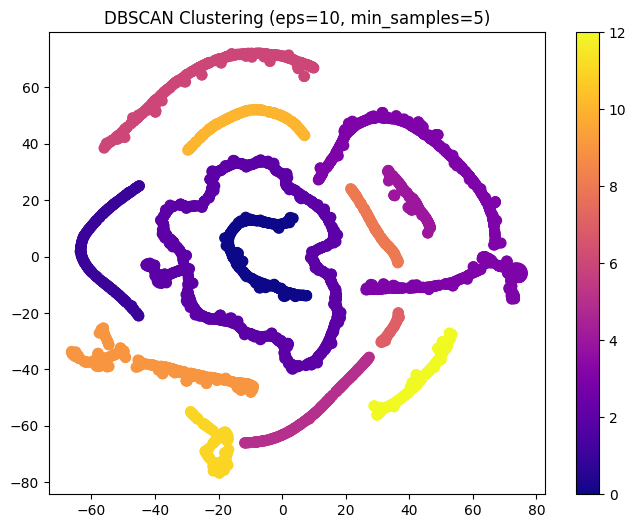

In [7]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)  
X_tsne = tsne.fit_transform(X_unscrambled)  # This will reduce your data to 2 dimensions

# Step 2: Apply DBSCAN for clustering
dbscan = DBSCAN(eps=5, min_samples=5)  # You can experiment with different eps and min_samples
labels = dbscan.fit_predict(X_tsne)

# Plot the DBSCAN clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='plasma', s=50)
plt.colorbar()
plt.title(f'DBSCAN Clustering (eps=10, min_samples=5)')
plt.show()

Already results that looks decent in 2d. maybe tsne was not a bad choice after all 

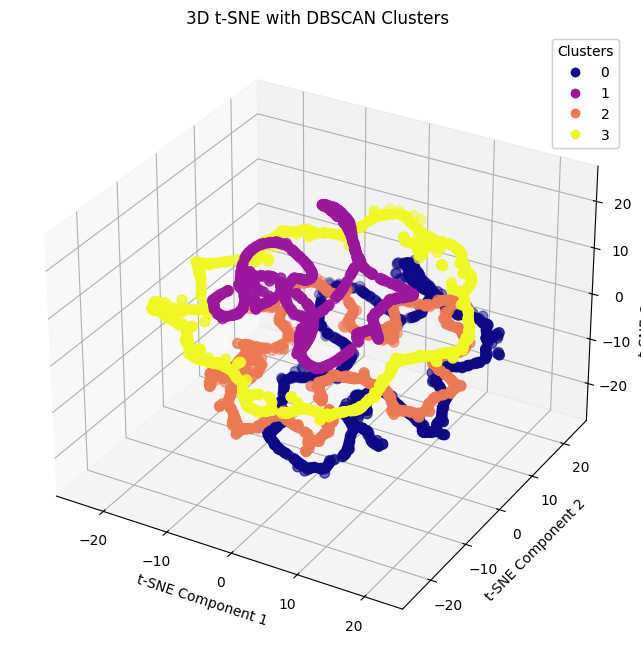

In [8]:

from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)

tsne = TSNE(n_components=3, random_state=42)  
#X_tsne = tsne.fit_transform(X_unscrambled) 
X_tsne = tsne.fit_transform(data) 
# Apply DBSCAN for clustering
dbscan = DBSCAN(eps=3, min_samples=5) 
labels = dbscan.fit_predict(X_tsne)

"""plot 2d
# Plot the t-SNE results with DBSCAN clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='plasma', s=25)
plt.colorbar()
plt.title('t-SNE with DBSCAN Clusters')
plt.show()
"""

#plot 3d
# Plot the 3D t-SNE result with DBSCAN clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points, color by cluster label
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=labels, cmap='plasma', s=50)

# Add color bar
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Set plot titles and labels
ax.set_title('3D t-SNE with DBSCAN Clusters')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')

# Show the plot
plt.show()



Very promising result where it seems like clusters are grouped like strings in 3d. Time to inspect how what they look like by moving around in 3d. For this we need an external library to generate an interactive 3d window in an html file. The code below does that 

In [9]:
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# Step 1: Apply t-SNE for dimensionality reduction to 3D
tsne = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne.fit_transform(data) 
# Step 2: Apply DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=5)
labels = dbscan.fit_predict(X_tsne_3d)

# Step 3: Create an interactive 3D plot with Plotly
fig = px.scatter_3d(
    x=X_tsne_3d[:, 0], 
    y=X_tsne_3d[:, 1], 
    z=X_tsne_3d[:, 2], 
    color=labels.astype(str),  # Convert labels to strings for coloring
    title="Interactive 3D t-SNE with DBSCAN Clusters",
    labels={'x': 't-SNE Component 1', 'y': 't-SNE Component 2', 'z': 't-SNE Component 3'}
)

# Set the layout to full screen
fig.update_layout(
    legend_title_text='Cluster',
    autosize=True,  # Automatically adjust to screen size
    width=1920,  # Full HD width
    height=1080,  # Full HD height
    margin=dict(l=0, r=0, t=0, b=0)  # Set margins to zero for full screen effect
)

# Customize markers and disable hover lines
fig.update_traces(marker=dict(size=5))  

# Save the plot as an HTML file
fig.write_html("interactive_3d_plot_fullscreen.html")

# The plot will now be full screen when you open the HTML file in a browser without hover lines

IDs = data['ID'] if 'ID' in data.columns else range(len(X_tsne))

# Create a DataFrame for submission
submission = pd.DataFrame({'ID': IDs, 'cluster': labels})

# Save to a CSV file
submission.to_csv('submission.csv', index=False)

print("Submission file saved as 'submission.csv'")


Submission file saved as 'submission.csv'


I highly recommend you try the 3d interactive plot to see why i decided that epsilon 3 and min samples 5 were a good choice. If you check the 3d graph you see that 4 of the graphs appear string like and seem connected (ofcourse they are not connected in a sence of lines, but are close to each other). This was the breakthrough that lead me to realize this would be the correct clustering. You can open the .html file provided with this project to visualize the plot in 3d interactively

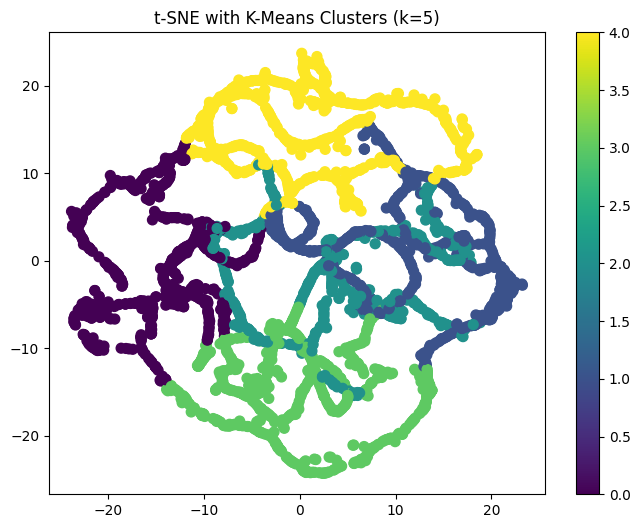

In [10]:
from sklearn.cluster import KMeans


tsne = TSNE(n_components=3, random_state=42)  
X_tsne = tsne.fit_transform(X_unscrambled)    


k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_tsne)

# Plot the t-SNE results with K-Means clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', s=50)
plt.colorbar()
plt.title(f't-SNE with K-Means Clusters (k={k})')
plt.show()


Just out of curiosity wanted to check how Kmeans would behave. As you can see the clusters are not at all string like. K means seems to be terrible at getting any good clusters that seem reasonable for the human eye for this dataset.  

In [11]:
# The dataset is heavy. Applying clustering directly on the dataset is not feasible, I guess. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 16384 entries, 0 to 16383
dtypes: float64(16384)
memory usage: 500.0 MB


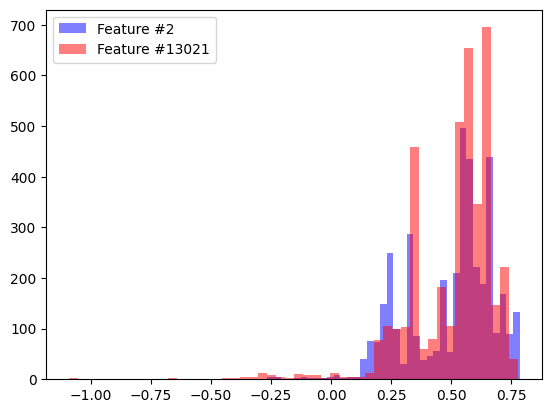

In [12]:
plt.hist(data.iloc[:, 2], bins=50, color='blue', alpha=0.5, label='Feature #2')
plt.hist(data.iloc[:, 13021], bins=50, color='red', alpha=0.5, label='Feature #13021')
plt.legend()

c:\Users\Bex\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

c:\Users\Bex\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



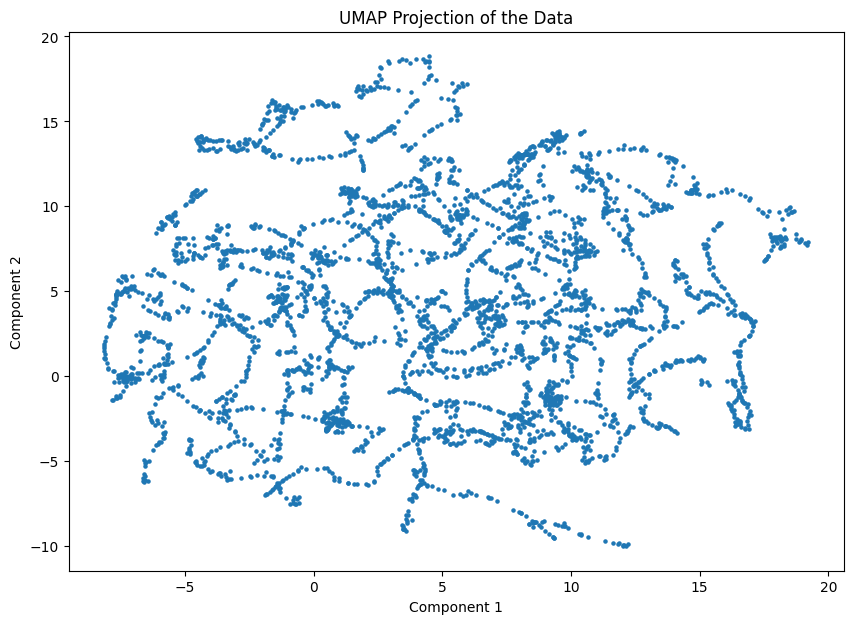

In [13]:
import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
# Get the ID column
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)
# Separate features and IDs
X = data.drop('ID', axis=1)
IDs = data['ID']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

reducer = umap.UMAP(n_components=3, n_neighbors=5, min_dist=.8, random_state=42)
X_reduced = reducer.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=5)
plt.title('UMAP Projection of the Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()



Honorable mentions: UMAP was the first choice of this task that i had, but it turns out it was hard to make much sense of it when using db scan and kmeans even when reducing it to 3 components like tsne. Explanations for why this might be not a good fit for this task is discussed in the discussion section if you scroll down. 

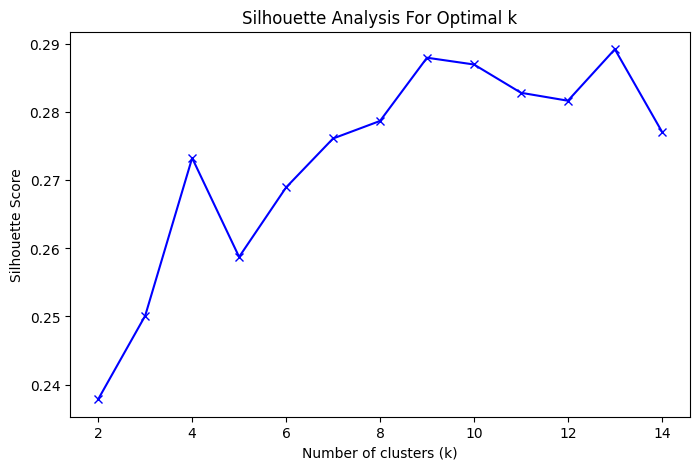

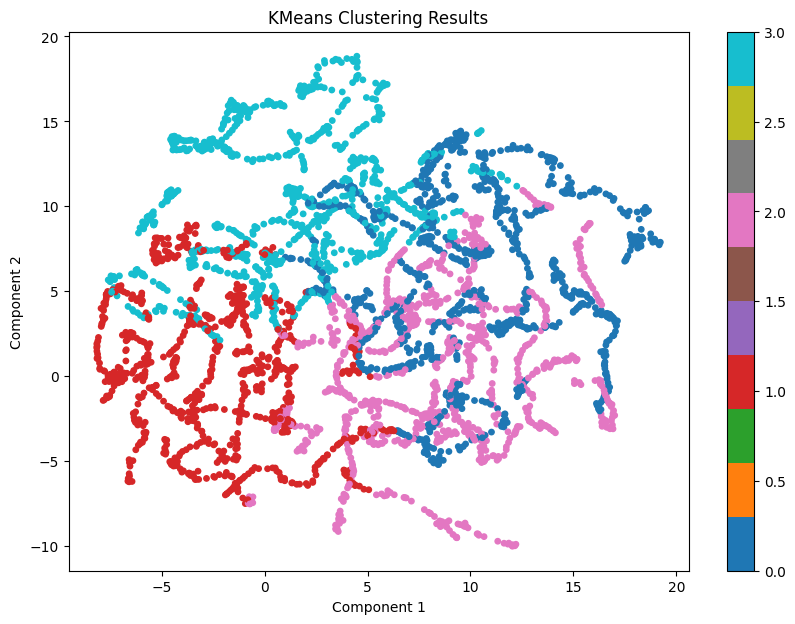

In [14]:
silhouette_scores = []
K = range(2, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_reduced)
    score = silhouette_score(X_reduced, labels)
    silhouette_scores.append(score)


n_clusters = 4  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels_kmeans = kmeans.fit_predict(X_reduced)

plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()

def plot_clusters(X, labels, title):
    plt.figure(figsize=(10, 7))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=15)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar()
    plt.show()

plot_clusters(X_reduced, labels_kmeans, 'KMeans Clustering Results')


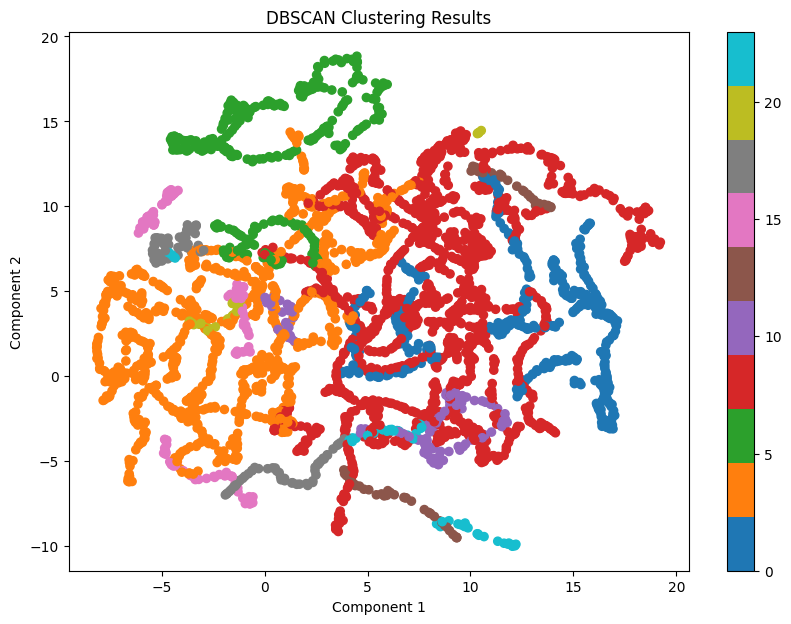

In [15]:
dbscan = DBSCAN(eps=2.2, min_samples=4)
labels_dbscan = dbscan.fit_predict(X_reduced)

# Function to plot clusters
def plot_clusters(X, labels, title):
    plt.figure(figsize=(10, 7))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=35)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar()
    plt.show()

# Plot the DBSCAN clustering results
plot_clusters(X_reduced, labels_dbscan, 'DBSCAN Clustering Results')

As i said i started with UMAP and combining it with silhoutte score to come up with good values for the number of clusters with Kmeans but seemed like i was on a wild goose chase so decided to abondon UMAP for something like TSNE + DBSCAN which gave a 100% clustering accuracy. On hindsight, i should have known better than to use K-means for this task as this is not linearly separable, which became clear once i visualized things in 3d. But even with DBScan it seems to give terrible results. 

 - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.

    I used TSNE which helped me determine the correct number of clusters. 

    PCA: Captures the axis (principal components) where the variance of the data is at maximum. It projects points to principal components. Then works orthogonally for all remaining dimensions. This wont work in our case because our clusters are not linearly separable. 

    T-SNE: Captures the local relationships between datapoints when reduction occurs. It does this by assigning distances to points a corresponding value from a gauss distribution. The farther away a point is from the point it is being compared to, the farther away it is from the center of the gaussian distribution. We do this for every point while storing their distribution values and then randomly put these points in a lower dimension. Then the distribution we calculated in the higher dimension will be used as a blueprint for trying to recreate the same distribution in the lower dimension. This is done using gradient descent with Kullback-Leibler divergence loss function which measures the similarity between two probability distributions.  This makes it a good choice when the data is not linearly separable. 

    UMAP: Similar to T-SNE but is a bit different in its implementation. UMAP captures both global (distances between clusters) and local structures (distances within a cluster) while T-SNE captures only local structures. I assume this is the reason why UMAP performs worse than T-SNE for this dataset, since there are too many similar pictures (rotated, brighter, darker versions of the same image etc.). 



   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.

      I used DBSCAN with hyperparameters epsilon 3 (distance between two points for them to be considered in the same neighborhood) and min samples 5 (the amount of points, including the point itself, to make a cluster). 

      Kmeans: Works by creating centroids and placing them randomly (Ofc its not placed within the original data, just calculated and stored) and comparing points to the closest centroid and adjusting the centroid iteratively by computing the mean of each cluster until the centroid positions stop changing. This results in Kmeans creating a linear separation between the clusters. So it goes without saying Kmeans is not suitable for non linearly separable clusters.  

      DBSCAN: Is a density based clustering algorithm. There are three types of points. Core points (has more points than min points within eps), border point (Neighbor of a core point but has less than min points in its neighborhood), noise point (any point that is not a core point nor a border point). Can cluster non linearly separable clusters. 

   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.

      As shown earlier in the first part of the code of this task, there are 4000 images in the dataset with 128*128 resolution where 4 of them are repeated a 1000 times with a bit of variation. We can plot each row as a 128 * 128 image and we open google maps and check the locations. 

         1. Trøndelag museum or Pirbadet (both are in the same building)
         2. Trøndheim spektrum or sør-trøndelag idrettskrets
         3. Ikea Leangen
         4. Studentersamfundet

   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?

   The hidden data type in the dataset is image data. Each observation (row) in the dataset represents an image that has been flattened into a one-dimensional array. Specifically, since there are 16,384 features (columns) per observation and 128×128 = 16384, it indicates that each image is of size 128x128 pixels. The reason why some of them might perform well while some don't is explained in the explanation of each dimensionality reduction algorithms and clustering algorithms in the previous tasks. 




   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.

   
   


---

## 🎯 Note: Clustering Accuracy Evaluation


The clustering accuracy metric evaluates how well the predicted clusters match the true clusters, irrespective of the specific labels or names assigned to the clusters.

This means that the evaluation focuses solely on the correct grouping of data points rather than the numerical labels of the clusters themselves.

## Key Characteristics

- **Name-Independent**: The metric cares only about how well the data points are grouped together, not the specific numerical or categorical labels used for the clusters.
- **Focus on Grouping**: The evaluation rewards cluster assignments that correctly group the same data points together, regardless of the specific labels assigned.

### Example

If the true cluster assignments are:

```
[0, 0, 0, 1, 1, 1]
```

and your predicted cluster assignments are:

```
[1, 1, 1, 0, 0, 0]
```

the accuracy will still be **1.0** because the grouping of points is identical, even though the numerical labels are swapped.

## How the Metric is Computed

1. **Contingency Matrix**: 
   - Construct a contingency matrix that represents the overlap between the true clusters and the predicted clusters.

2. **Optimal Correspondence**: 
   - Use an optimization algorithm, such as the Hungarian method (linear sum assignment), to find the best possible correspondence between true and predicted labels, maximizing the number of correctly assigned data points.

3. **Accuracy Calculation**: 
   - Calculate the accuracy as the ratio of correctly matched data points to the total number of data points.

> This approach ensures that the evaluation is based on **cluster completeness** and **homogeneity**, rewarding cluster assignments that correctly group the same data points together, regardless of the specific labels used.

---

In [16]:
from typing import Any
import numpy as np
import sklearn.metrics
import scipy.optimize

def calculate_clustering_accuracy(true_labels: np.ndarray, cluster_labels: np.ndarray) -> float:
    """
    Calculate the clustering accuracy between true labels and cluster labels.

    The function constructs a contingency matrix between the true labels and cluster labels.
    It then uses the Hungarian algorithm (also known as linear sum assignment) to find the
    best matching between the cluster labels and true labels. The clustering accuracy is 
    calculated as the number of correctly matched labels divided by the total number of labels.

    Args:
        true_labels (np.ndarray): An array of true labels for each data point.
        cluster_labels (np.ndarray): An array of cluster labels predicted by a clustering algorithm.

    Returns:
        float: The clustering accuracy, a value between 0 and 1 representing the proportion of 
               correctly matched labels.
    
    Example:
        >>> true_labels = np.array([0, 1, 2, 0, 1, 2])
        >>> cluster_labels = np.array([1, 2, 0, 1, 2, 0])
        >>> calculate_clustering_accuracy(true_labels, cluster_labels)
        1.0

    Raises:
        ValueError: If true_labels and cluster_labels are not of the same length.
    """
    # Check if the input labels are of the same length
    if true_labels.size != cluster_labels.size:
        raise ValueError("true_labels and cluster_labels must have the same length.")

    # Construct a contingency matrix where each cell [i, j] indicates the number of points with 
    # true label i and cluster label j.
    contingency_matrix = sklearn.metrics.cluster.contingency_matrix(true_labels, cluster_labels)
    
    # Find the best matching between true labels and cluster labels using the Hungarian algorithm.
    # We negate the contingency matrix because linear_sum_assignment finds the minimum cost assignment.
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(-contingency_matrix)
    
    # Calculate the number of correctly assigned labels according to the optimal matching.
    correct_pairs = contingency_matrix[row_ind, col_ind].sum()
    
    # Compute the clustering accuracy as the ratio of correctly matched labels to total labels.
    accuracy = correct_pairs / true_labels.size

    return accuracy


In [17]:
true_labels = np.array([0, 1, 2, 0, 1, 2])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

1.0

In [18]:
true_labels = np.array([0, 0, 0, 0, 0, 0])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

0.3333333333333333

In [19]:
true_labels = np.array([1, 1, 1, 2, 2, 2])
cluster_labels = np.array([0, 0, 0, 0, 0, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

0.5